In [7]:
as_list = [(1,1,2)]*20

In [8]:
as_list[0]

(1, 1, 2)

In [9]:
import numpy as np
as_np = np.array(as_list)

In [13]:
idx = [0,4,10]

In [14]:
as_np[idx]

array([[1, 1, 2],
       [1, 1, 2],
       [1, 1, 2]])

In [15]:
write_list = [f"{','.join(f'{i:.2f}' for i in force)}" for force in as_np[idx]]
write_string = "\t".join(write_list) + "\n"

In [16]:
write_string

'1.00,1.00,2.00\t1.00,1.00,2.00\t1.00,1.00,2.00\n'

In [17]:
print(write_string)

1.00,1.00,2.00	1.00,1.00,2.00	1.00,1.00,2.00



In [18]:
import h5py

In [21]:
with h5py.File("test.hdf5", 'w') as f:
    outfile = f.create_dataset('dataset', dtype=)

TypeError: Cannot interpret '<built-in function array>' as a data type

In [20]:
np.array

numpy.dtype

In [22]:
as_np.dtype

dtype('int64')

# test loading written file

In [34]:
force_file = "/Volumes/Rohirrim/local_test/enhanced_sampling/pulling/open_to_closed/frame00/forces.txt"

In [35]:
import pandas as pd

In [36]:
df = pd.read_csv(force_file, sep="\t", header=None)

In [37]:
df

,0,1,2,3,4,5,6,7,8,9,...,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681
0,187.05,101.09,104.46,162.46,57.99,168.33,157.12,95.58,83.55,203.39,...,324.99,242.38,260.29,250.33,299.44,163.03,259.87,224.18,146.67,230.38


In [64]:
force_array = np.loadtxt(force_file)

In [65]:
np.shape(force_array)

(10, 2682)

In [66]:
len(force_array)

10

In [67]:
n_frames = len(force_array)

In [68]:
n_atoms = 894

In [69]:
compact_array = force_array.reshape((n_frames, n_atoms, 3))

In [71]:
compact_array

array([[[188.38,  98.5 , 103.78],
        [164.38,  58.65, 167.24],
        [157.61,  94.51,  80.92],
        ...,
        [242.72, 260.93, 250.25],
        [300.15, 160.65, 260.25],
        [223.88, 146.56, 229.78]],

       [[179.33, 104.58, 113.54],
        [159.93,  59.97, 168.31],
        [150.16, 103.87,  76.85],
        ...,
        [236.01, 247.38, 263.29],
        [304.05, 152.54, 257.72],
        [205.74, 135.92, 218.62]],

       [[175.58,  91.19, 121.33],
        [171.77,  57.07, 168.96],
        [173.79,  94.41,  79.48],
        ...,
        [227.1 , 254.58, 261.25],
        [282.42, 132.69, 264.71],
        [211.2 , 140.6 , 207.17]],

       ...,

       [[129.03,  45.85, 141.53],
        [135.8 ,  66.21, 122.61],
        [134.  , 119.58,  29.79],
        ...,
        [204.2 , 238.28, 213.37],
        [274.28, 100.87, 252.56],
        [212.3 , 134.26, 193.01]],

       [[ 98.73,  45.54, 149.68],
        [129.33,  82.08, 109.2 ],
        [147.05, 122.54,  20.74],
        .

In [73]:
force_mag = np.linalg.norm(compact_array, 2, axis=2)

In [75]:
np.shape(force_mag)

(10, 894)

In [90]:
chaina = force_mag.T[:447]

In [91]:
chainb = force_mag.T[447:]

In [92]:
np.shape(chaina)

(447, 10)

In [93]:
import matplotlib.pyplot as plt

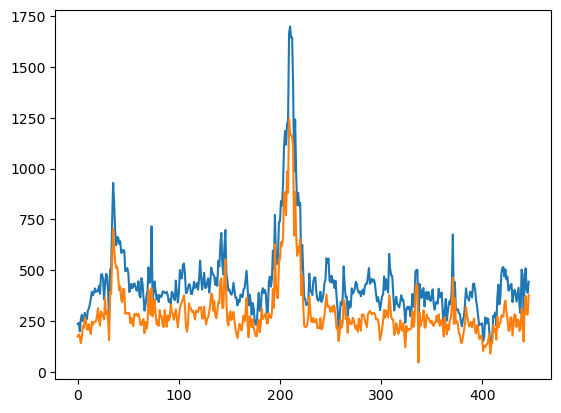

In [104]:
plt.plot(chaina[:,0])
plt.plot(chaina[:,-1])

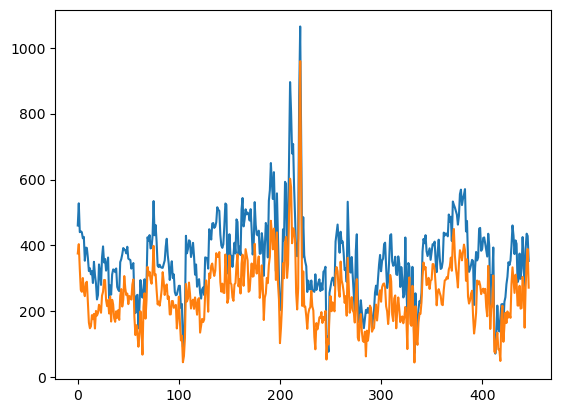

In [106]:
plt.plot(chainb[:,0])
plt.plot(chainb[:,-1])